In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 17.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.2.0 which is incompatible.


In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [6]:
import pmdarima as pm
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.22 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.37 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.29 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.07 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.17 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.37 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.08 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.21 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Mon, 05 Feb 2024   AIC                            905.686
Time:                                    13:55:49   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

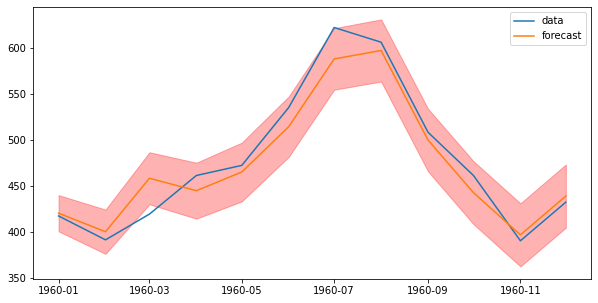

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

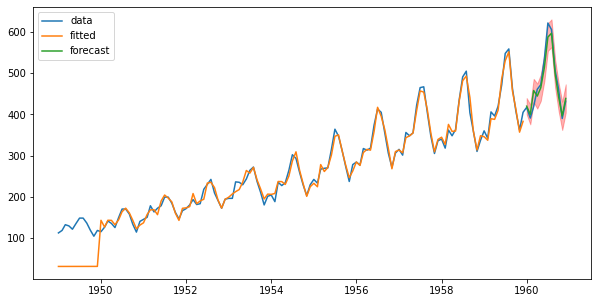

In [10]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [11]:
logmodel = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-438.999, Time=1.05 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.01 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=0.92 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.28 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.328, Time=1.99 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=0.95 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.575, Time=0.64 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.17 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-439.505, Time=0.84 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.525, Time=1.97 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [12]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Mon, 05 Feb 2024   AIC                           -448.052
Time:                                      13:59:02   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.6004      0.083      7.273      0.000       0.439       0.762
ar.L2          0.2415      0.085      2.851      0.004       0.076       0.408
ma.S.L12      -0.5668      0.105     -5.411      0.000      -0.772      -0.361
sigma2         0.0012      0.000      8.190      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.09
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

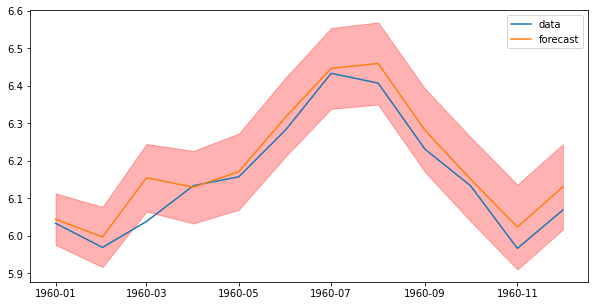

In [13]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

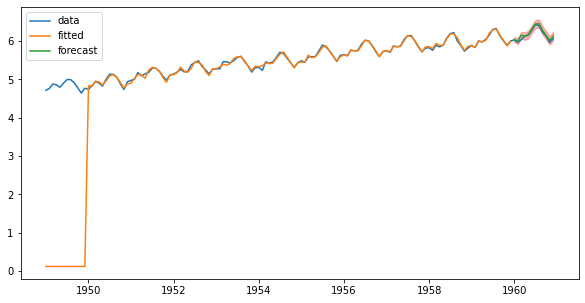

In [14]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [15]:
### forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))
print("Non-logged RMSE:", rmse(test['Passengers'], test_pred))
print("Logged RMSE:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RMSE: 18.536468901818
Logged RMSE: 23.06049468196698


In [16]:
### non-seasonal
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      d=0,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=826.758, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-209.510, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-211.836, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-207.034, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-211.840, Time=0.21 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-211.176, Time=0.17 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18

/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(6,0,1)(0,0,0)[0]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/pmdarima/arima/_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/Users/stefanduprey/opt/miniconda3/lib/python3.9/site-packages/pmdarima/arima/arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "/Users/stefanduprey/opt/miniconda3/lib/python3.9/si

 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=nan sec
 ARIMA(6,0,2)(0,0,0)[0]             : AIC=-218.569, Time=0.34 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=-214.340, Time=0.42 sec
 ARIMA(7,0,2)(0,0,0)[0]             : AIC=-234.867, Time=0.46 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=-211.996, Time=0.48 sec
 ARIMA(8,0,2)(0,0,0)[0]             : AIC=-238.811, Time=0.53 sec
 ARIMA(9,0,0)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(9,0,1)(0,0,0)[0]             : AIC=-210.279, Time=0.64 sec
 ARIMA(9,0,2)(0,0,0)[0]             : AIC=24.000, Time=0.31 sec
 ARIMA(10,0,0)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(10,0,1)(0,0,0)[0]             : AIC=-238.241, Time=0.58 sec
 ARIMA(10,0,2)(0,0,0)[0]             : AIC=26.000, Time=0.42 sec
 ARIMA(11,0,0)(0,0,0)[0]             : AIC=inf, Time=0.71 sec
 ARIMA(11,0,1)(0,0,0)[0]             : AI

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 0, 2)   Log Likelihood                 166.992
Date:                Mon, 05 Feb 2024   AIC                           -303.984
Time:                        14:01:25   BIC                           -260.742
Sample:                             0   HQIC                          -286.412
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0432      0.083      0.523      0.601      -0.119       0.205
ar.L2          0.1994      0.096      2.083      0.037       0.012       0.387
ar.L3          0.1142      0.098      1.166      0.243      -0.078       0.306
ar.L4         -0.1078      0.079     -1.362      0.173      -0.263       0.047
ar.L5          0.0377      0.077      0.488      0.626      -0.114       0.189
ar.L6          0.0645      0.079      0.815      0.415      -0.091       0.220
ar.L7         -0.0453      0.085     -0.536      0.592      -0.211       0.120
ar.L8         -0.1023      0.084     -1.219      0.223      -0.267       0.062
ar.L9          0.0027      0.079      0.033      0.973      -0.153       0.158
ar.L10         0.1099      0.076      1.446      0.148      -0.039       0.259
ar.L11        -0.0812      0.081     -1.007      0.314      -0.239       0.077
ar.L12         0.7650      0.080      9.520      0.000       0.607       0.922
ma.L1          0.9801      0.096     10.184      0.000       0.791       1.169
ma.L2          0.6317      0.083      7.641      0.000       0.470       0.794
sigma2         0.0038      0.001      6.813      0.000       0.003       0.005
===================================================================================
Ljung-Box (L1) (Q):                   4.62   Jarque-Bera (JB):                 0.98
Prob(Q):                              0.03   Prob(JB):                         0.61
Heteroskedasticity (H):               0.50   Skew:                             0.21
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

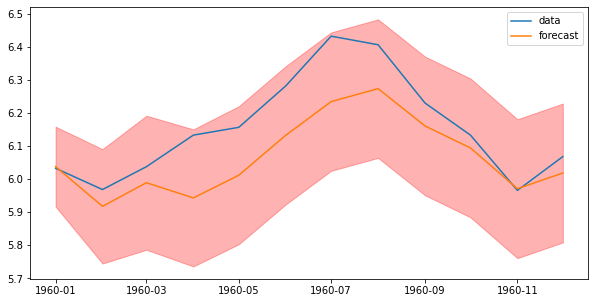

In [18]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

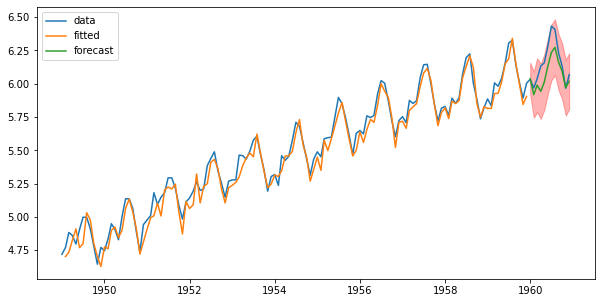

In [19]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [20]:
rmse(test['Passengers'], np.exp(test_pred))

55.36773658028325

In [21]:
### non-seasonal non-logged
model = pm.auto_arima(train['Passengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, max_q=2, max_order=14,
                      stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1261.216, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1254.439, Time=0.07 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1245.588, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 2)   Log Likelihood                -494.031
Date:                Mon, 05 Feb 2024   AIC                           1020.062
Time:                        14:02:21   BIC                           1066.065
Sample:                             0   HQIC                          1038.755
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.1064      3.023      2.020      0.043       0.182      12.031
ar.L1         -0.0766      0.143     -0.536      0.592      -0.357       0.204
ar.L2         -0.2994      0.142     -2.113      0.035      -0.577      -0.022
ar.L3         -0.1340      0.117     -1.149      0.251      -0.363       0.095
ar.L4         -0.2844      0.115     -2.482      0.013      -0.509      -0.060
ar.L5         -0.0919      0.116     -0.790      0.429      -0.320       0.136
ar.L6         -0.3053      0.112     -2.716      0.007      -0.526      -0.085
ar.L7         -0.1006      0.124     -0.814      0.416      -0.343       0.142
ar.L8         -0.3148      0.120     -2.624      0.009      -0.550      -0.080
ar.L9         -0.0835      0.120     -0.695      0.487      -0.319       0.152
ar.L10        -0.3179      0.129     -2.470      0.013      -0.570      -0.066
ar.L11        -0.0756      0.130     -0.583      0.560      -0.330       0.178
ar.L12         0.6366      0.126      5.058      0.000       0.390       0.883
ma.L1         -0.0961      0.157     -0.610      0.542      -0.404       0.212
ma.L2          0.2346      0.185      1.267      0.205      -0.128       0.598
sigma2        97.8884     15.342      6.381      0.000      67.819     127.958
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                13.04
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               1.86   Skew:                            -0.19
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

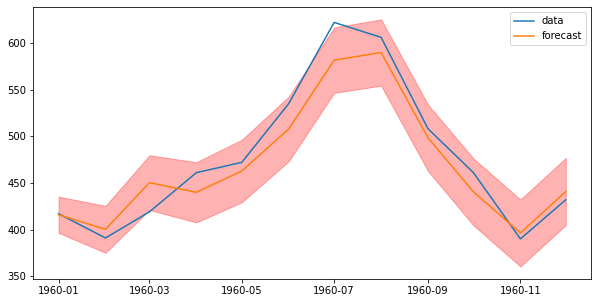

In [23]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();

In [24]:
rmse(test['Passengers'], test_pred)

20.151252602400405